梁宇佳 Chapter 11

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import mpl_toolkits.mplot3d

In [4]:
import scipy.sparse as sp

In [5]:
import scipy.sparse.linalg

In [6]:
import scipy.linalg as la

In [7]:
N = 5

In [8]:
u0 = 1
u1 = 2

In [9]:
dx = 1.0 / (N + 1)

In [10]:
A = (np.eye(N, k=-1) - 2 * np.eye(N) + np.eye(N, k=1)) / dx**2

In [11]:
A

array([[-72.,  36.,   0.,   0.,   0.],
       [ 36., -72.,  36.,   0.,   0.],
       [  0.,  36., -72.,  36.,   0.],
       [  0.,   0.,  36., -72.,  36.],
       [  0.,   0.,   0.,  36., -72.]])

In [12]:
d = -5 * np.ones(N)
d[0] -= u0 / dx**2
d[N-1] -= u1 / dx**2

In [13]:
u = np.linalg.solve(A, d)

In [14]:
x = np.linspace(0, 1, N+2)

In [15]:
U = np.hstack([[u0], u, [u1]])

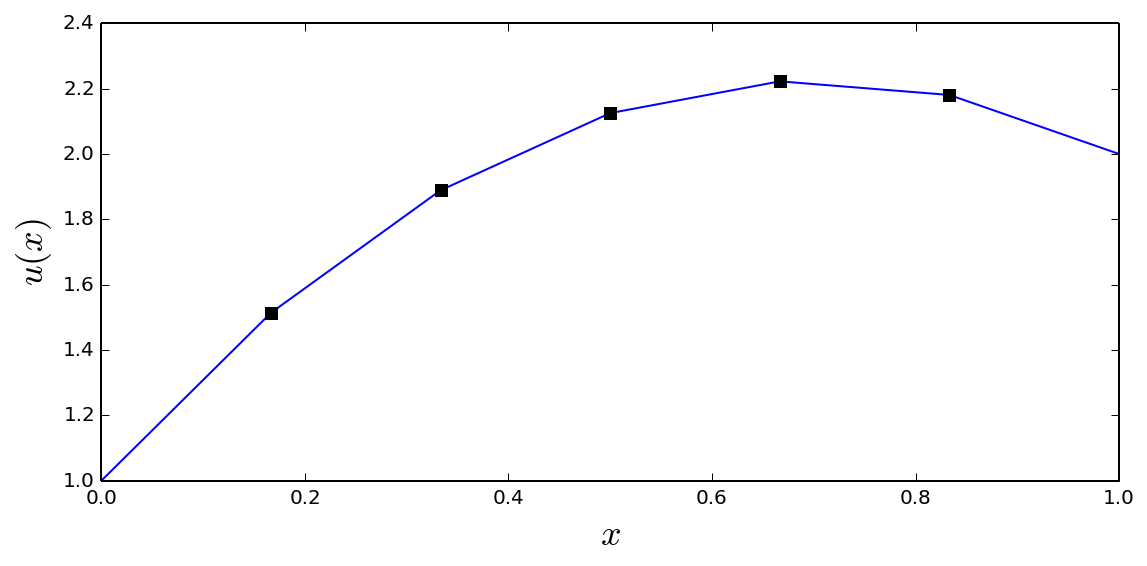

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, U)
ax.plot(x[1:-1], u, 'ks')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)
fig.tight_layout();

In [15]:
N = 100

In [16]:
u0_t, u0_b = 5, -5

In [17]:
u0_l, u0_r = 3, -1

In [18]:
dx = 1. / (N+1)

In [19]:
A_1d = (sp.eye(N, k=-1) + sp.eye(N, k=1) - 4 * sp.eye(N))/dx**2

In [20]:
A = sp.kron(sp.eye(N), A_1d) + (sp.eye(N**2, k=-N) + sp.eye(N**2, k=N))/dx**2

In [21]:
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

In [25]:
d = np.zeros((N, N))

d[0, :] += -u0_b 
d[-1, :] += -u0_t
d[:, 0] += -u0_l
d[:, -1] += -u0_r

d = d.reshape(N**2) / dx**2

In [26]:
u = sp.linalg.spsolve(A, d).reshape(N, N)

In [27]:
U = np.vstack([np.ones((1, N+2)) * u0_b,
               np.hstack([np.ones((N, 1)) * u0_l, u, np.ones((N, 1)) * u0_r]),
               np.ones((1, N+2)) * u0_t])

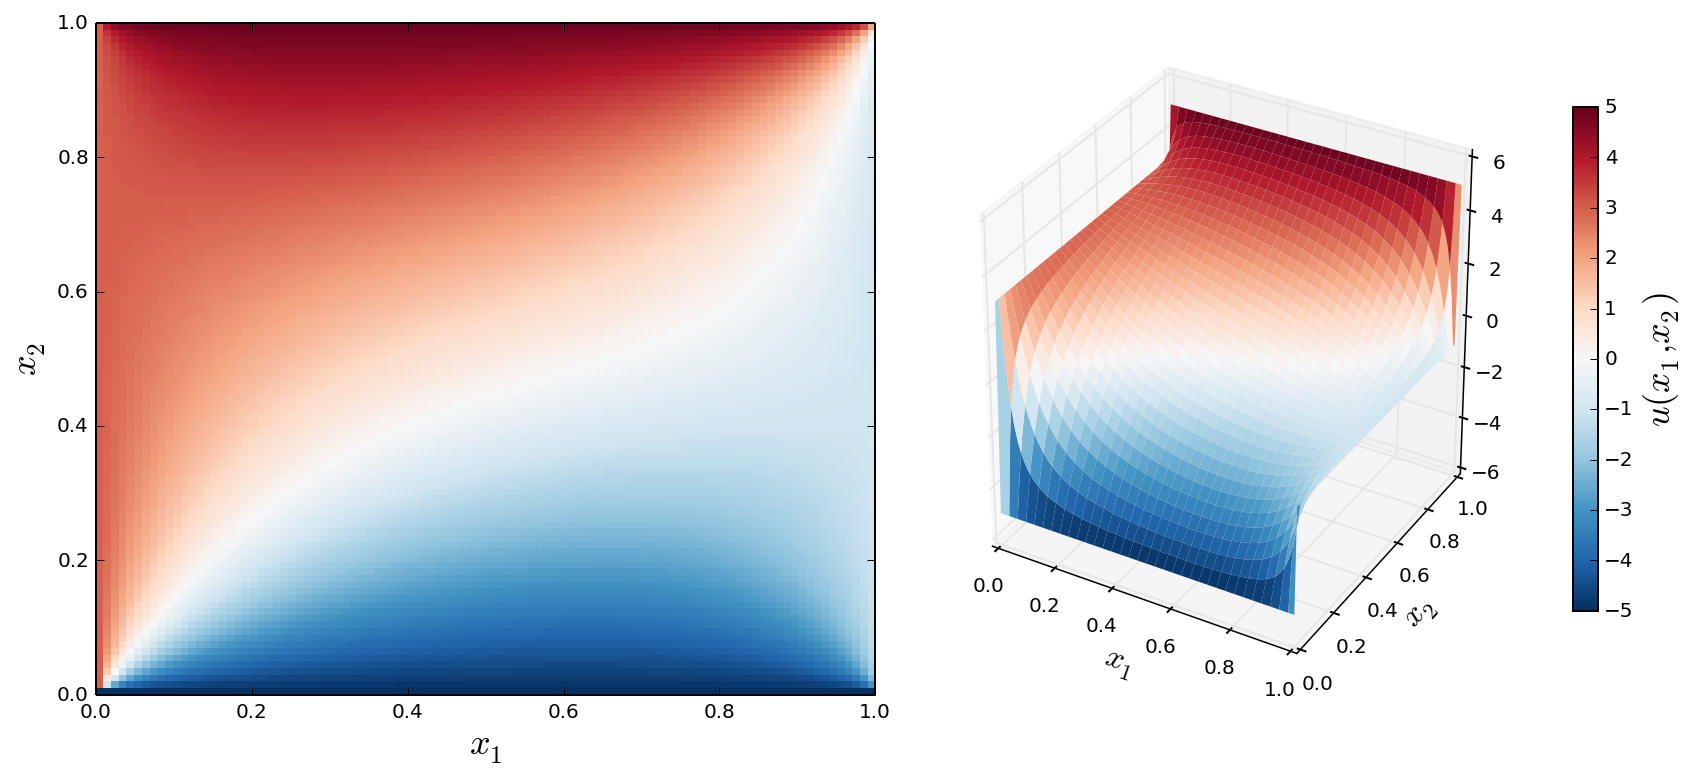

In [30]:
fig = plt.figure(figsize=(12, 5.5))
cmap = mpl.cm.get_cmap('RdBu_r')

ax = fig.add_subplot(1, 2, 1)
p = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, U, vmin=-5, vmax=5, rstride=3, cstride=3, linewidth=0, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=16)
ax.set_ylabel(r"$x_2$", fontsize=16)
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)
fig.tight_layout()

In [22]:
A_dense = A.todense()

In [32]:
%timeit np.linalg.solve(A_dense, d)

1 loops, best of 3: 10.1 s per loop


In [33]:
%timeit la.solve(A_dense, d)

1 loops, best of 3: 12.2 s per loop


In [34]:
%timeit sp.linalg.spsolve(A, d)

10 loops, best of 3: 33.9 ms per loop


In [70]:
u_mat1 = u_sol1.vector().array().reshape(N1+1, N2+1)

In [71]:
u_mat2 = u_sol2.vector().array().reshape(N1+1, N2+1)

In [72]:
X, Y = np.meshgrid(np.linspace(0, 1, N1+2), np.linspace(0, 1, N2+2))

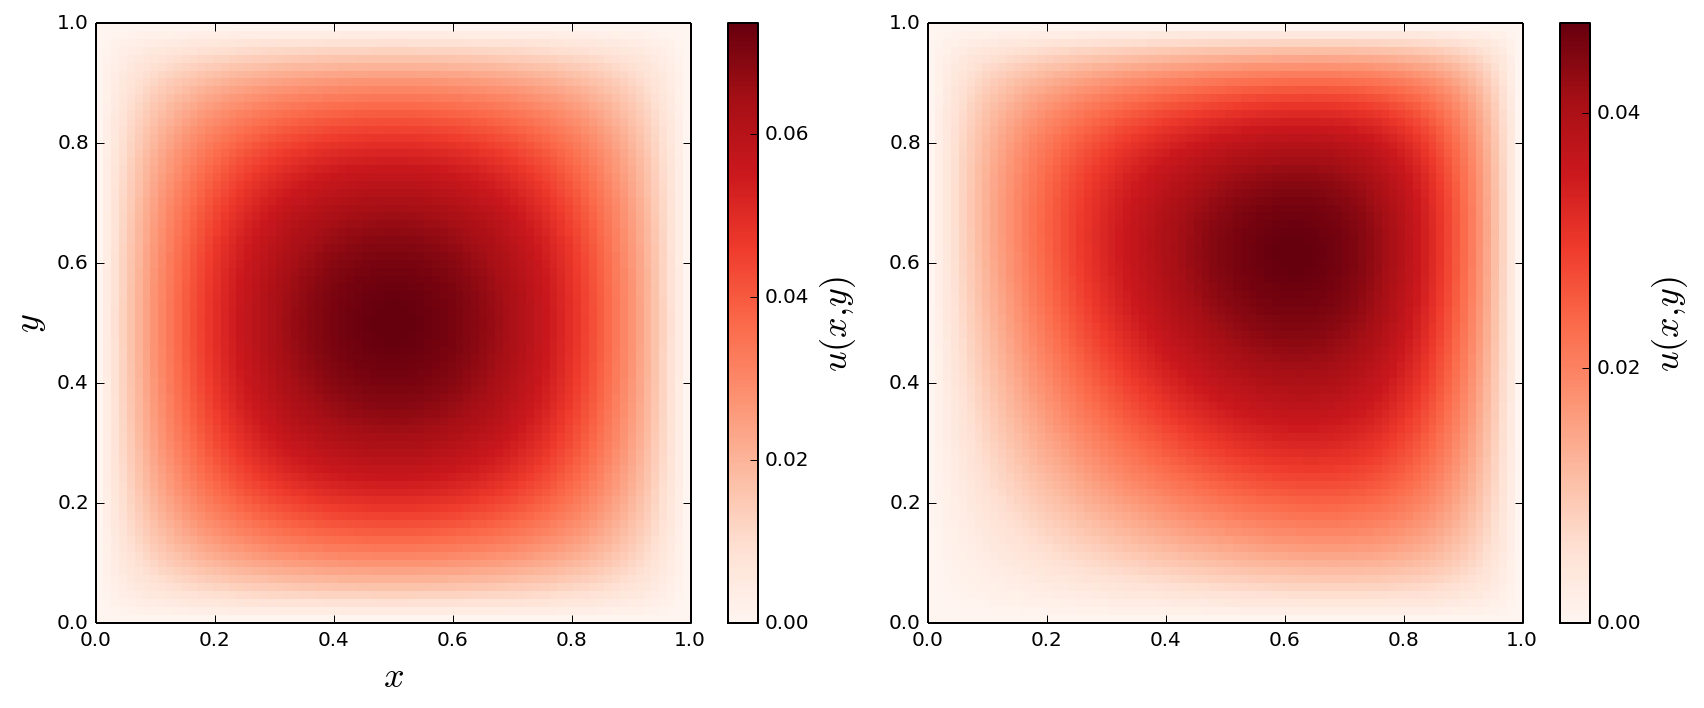

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
cmap = mpl.cm.get_cmap('Reds')

c = ax1.pcolor(X, Y, u_mat1, cmap=cmap)
cb = plt.colorbar(c, ax=ax1)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)
cb.set_ticks([0.0, 0.02, 0.04, 0.06])

c = ax2.pcolor(X, Y, u_mat2, cmap=cmap)
cb = plt.colorbar(c, ax=ax2)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)
cb.set_ticks([0.0, 0.02, 0.04])

fig.tight_layout()

In [76]:
def mesh_triangulation(mesh):
    coordinates = mesh.coordinates()
    triangles = mesh.cells()
    triangulation = mpl.tri.Triangulation(coordinates[:, 0], coordinates[:, 1], triangles)
    return triangulation

In [77]:
triangulation = mesh_triangulation(mesh)

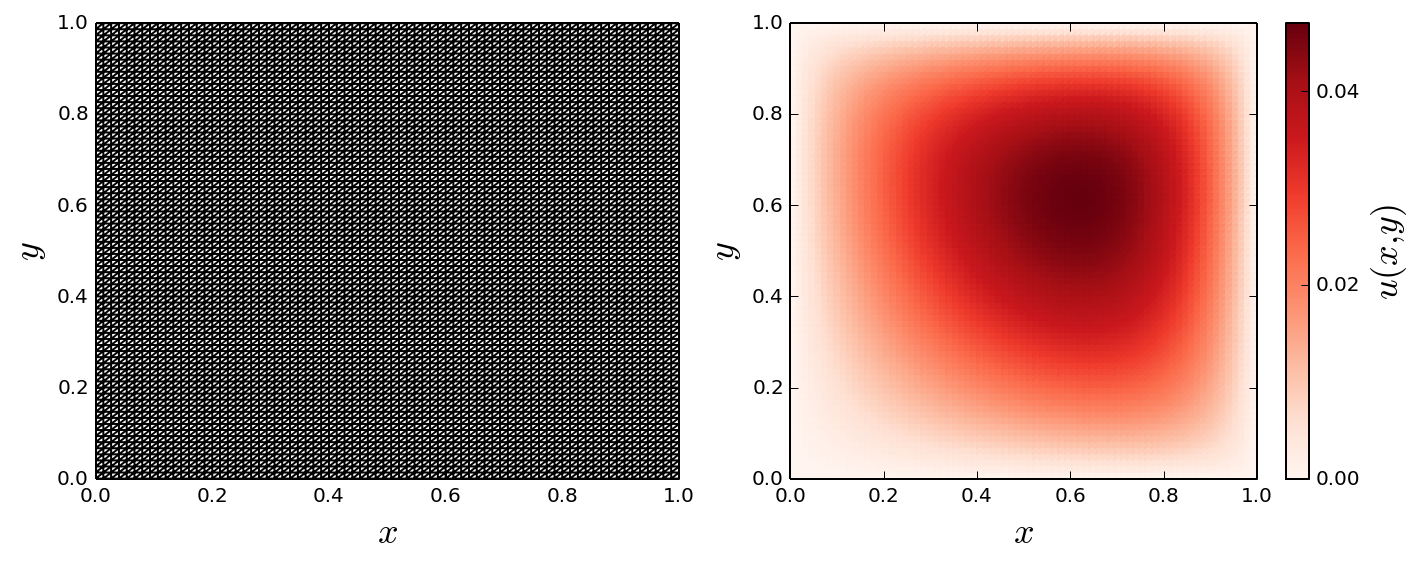

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.triplot(triangulation)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$y$", fontsize=18)

c = ax2.tripcolor(triangulation, u_sol2.vector().array(), cmap=cmap)
cb = plt.colorbar(c, ax=ax2)
ax2.set_xlabel(r"$x$", fontsize=18)
ax2.set_ylabel(r"$y$", fontsize=18)
cb.set_label(r"$u(x, y)$", fontsize=18)
cb.set_ticks([0.0, 0.02, 0.04])

fig.tight_layout()

In [96]:
x = np.linspace(0, 1, N1+2)
y = np.linspace(0, 1, N1+2)
X, Y = np.meshgrid(x, y)

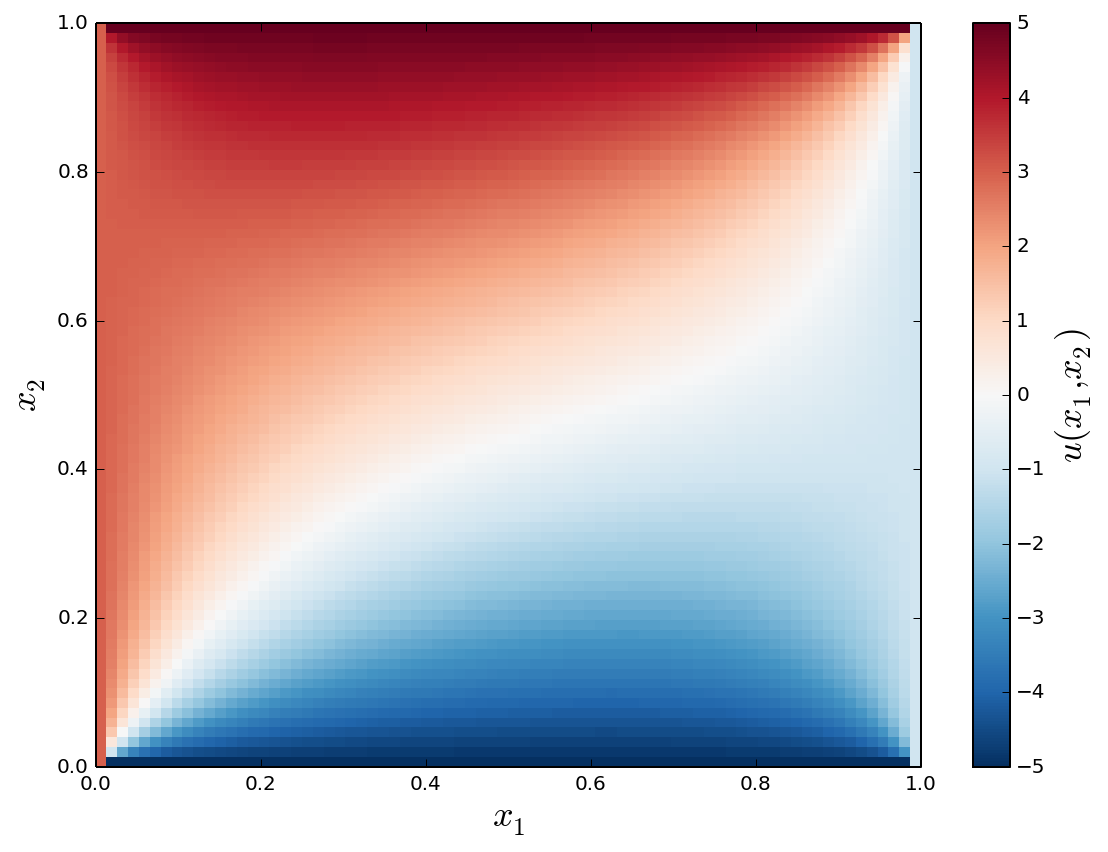

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

c = ax.pcolor(X, Y, u_mat, vmin=-5, vmax=5, cmap=mpl.cm.get_cmap('RdBu_r'))
cb = plt.colorbar(c, ax=ax)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)
fig.tight_layout()